*****Import Libraries*****

In [191]:
#Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

****Read the xlsx file****

In [194]:
#Step 2: Read the xlsx file
df = pd.read_excel("online_sales_dataset.xlsx")

# Display the DataFrame
print(df)
df

       InvoiceNo StockCode   Description  Quantity         InvoiceDate  \
0         221958  SKU_1964     White Mug        38 2020-01-01 00:00:00   
1         771155  SKU_1241     White Mug        18 2020-01-01 01:00:00   
2         231932  SKU_1501    Headphones        49 2020-01-01 02:00:00   
3         465838  SKU_1760     Desk Lamp        14 2020-01-01 03:00:00   
4         359178  SKU_1386     USB Cable       -30 2020-01-01 04:00:00   
...          ...       ...           ...       ...                 ...   
49777     354083  SKU_1562      Blue Pen        25 2025-09-05 01:00:00   
49778     296698  SKU_1930     USB Cable         7 2025-09-05 02:00:00   
49779     177622  SKU_1766  Office Chair        43 2025-09-05 03:00:00   
49780     701213  SKU_1602      Notebook        48 2025-09-05 04:00:00   
49781     772215  SKU_1832     White Mug        30 2025-09-05 05:00:00   

       UnitPrice  CustomerID         Country  Discount  PaymentMethod  \
0           1.71     37039.0       Aus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


****Understanding The Data****

In [197]:
#Step 3: Basic Information
print("\n--- Dataset Overview ---")
print("Shape of the dataset:", df.shape)
print(df.head())


--- Dataset Overview ---
Shape of the dataset: (49782, 17)
   InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38 2020-01-01 00:00:00       1.71   
1     771155  SKU_1241   White Mug        18 2020-01-01 01:00:00      41.25   
2     231932  SKU_1501  Headphones        49 2020-01-01 02:00:00      29.11   
3     465838  SKU_1760   Desk Lamp        14 2020-01-01 03:00:00      76.68   
4     359178  SKU_1386   USB Cable       -30 2020-01-01 04:00:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  Ret

In [199]:
#Step 4: Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64


In [201]:
#Step 5: Summary statistics
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
           InvoiceNo      Quantity          InvoiceDate     UnitPrice  \
count   49782.000000  49782.000000                49782  49782.000000   
mean   550681.239946     22.372343  2022-11-03 02:30:00     47.537862   
min    100005.000000    -50.000000  2020-01-01 00:00:00    -99.980000   
25%    324543.000000     11.000000  2021-06-02 13:15:00     23.592500   
50%    552244.000000     23.000000  2022-11-03 02:30:00     48.920000   
75%    776364.000000     37.000000  2024-04-04 15:45:00     74.610000   
max    999997.000000     49.000000  2025-09-05 05:00:00    100.000000   
std    260703.009944     17.917774                  NaN     33.479510   

         CustomerID      Discount  ShippingCost  
count  44804.000000  49782.000000  47293.000000  
mean   55032.871775      0.275748     17.494529  
min    10001.000000      0.000000      5.000000  
25%    32750.750000      0.130000     11.220000  
50%    55165.000000      0.260000     17.500000  
75%    77306.2

*****Data Wrangling and Cleaning*****

In [204]:
#Step 6: Convert column names to lowercase
df.columns = df.columns.str.lower()

# Display the updated DataFrame
print(df)

       invoiceno stockcode   description  quantity         invoicedate  \
0         221958  SKU_1964     White Mug        38 2020-01-01 00:00:00   
1         771155  SKU_1241     White Mug        18 2020-01-01 01:00:00   
2         231932  SKU_1501    Headphones        49 2020-01-01 02:00:00   
3         465838  SKU_1760     Desk Lamp        14 2020-01-01 03:00:00   
4         359178  SKU_1386     USB Cable       -30 2020-01-01 04:00:00   
...          ...       ...           ...       ...                 ...   
49777     354083  SKU_1562      Blue Pen        25 2025-09-05 01:00:00   
49778     296698  SKU_1930     USB Cable         7 2025-09-05 02:00:00   
49779     177622  SKU_1766  Office Chair        43 2025-09-05 03:00:00   
49780     701213  SKU_1602      Notebook        48 2025-09-05 04:00:00   
49781     772215  SKU_1832     White Mug        30 2025-09-05 05:00:00   

       unitprice  customerid         country  discount  paymentmethod  \
0           1.71     37039.0       Aus

In [206]:
#Step 7: Mapping of old column names to new column names
column_mapping = {
     'invoiceno': 'invoice_no',
        'stockcode': 'stock_code',
        'description': 'description',
        'quantity': 'quantity',
        'invoicedate': 'invoice_date',
        'unitprice': 'unit_price',
        'customerid': 'customer_id',
        'country': 'country',
        'discount': 'discount',
        'paymentmethod': 'payment_method',
        'shippingcost': 'shipping_cost',
        'category': 'category',
        'saleschannel': 'sales_channel',
        'returnstatus': 'return_status',
        'shipmentprovider': 'shipment_provider',
        'warehouselocation': 'warehouse_location',
        'orderpriority': 'order_priority'
}

# Rename the columns
df.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame
print(df)

       invoice_no stock_code   description  quantity        invoice_date  \
0          221958   SKU_1964     White Mug        38 2020-01-01 00:00:00   
1          771155   SKU_1241     White Mug        18 2020-01-01 01:00:00   
2          231932   SKU_1501    Headphones        49 2020-01-01 02:00:00   
3          465838   SKU_1760     Desk Lamp        14 2020-01-01 03:00:00   
4          359178   SKU_1386     USB Cable       -30 2020-01-01 04:00:00   
...           ...        ...           ...       ...                 ...   
49777      354083   SKU_1562      Blue Pen        25 2025-09-05 01:00:00   
49778      296698   SKU_1930     USB Cable         7 2025-09-05 02:00:00   
49779      177622   SKU_1766  Office Chair        43 2025-09-05 03:00:00   
49780      701213   SKU_1602      Notebook        48 2025-09-05 04:00:00   
49781      772215   SKU_1832     White Mug        30 2025-09-05 05:00:00   

       unit_price  customer_id         country  discount payment_method  \
0           

In [208]:
#Step 8: Convert customer_id from float to integer, skipping NA and inf values
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce').fillna(0).astype(int)

# Display the updated DataFrame
print(df)

       invoice_no stock_code   description  quantity        invoice_date  \
0          221958   SKU_1964     White Mug        38 2020-01-01 00:00:00   
1          771155   SKU_1241     White Mug        18 2020-01-01 01:00:00   
2          231932   SKU_1501    Headphones        49 2020-01-01 02:00:00   
3          465838   SKU_1760     Desk Lamp        14 2020-01-01 03:00:00   
4          359178   SKU_1386     USB Cable       -30 2020-01-01 04:00:00   
...           ...        ...           ...       ...                 ...   
49777      354083   SKU_1562      Blue Pen        25 2025-09-05 01:00:00   
49778      296698   SKU_1930     USB Cable         7 2025-09-05 02:00:00   
49779      177622   SKU_1766  Office Chair        43 2025-09-05 03:00:00   
49780      701213   SKU_1602      Notebook        48 2025-09-05 04:00:00   
49781      772215   SKU_1832     White Mug        30 2025-09-05 05:00:00   

       unit_price  customer_id         country  discount payment_method  \
0           

In [357]:
# For IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [359]:
# Encode customer_id if it's not numeric
if df['customer_id'].dtype == 'O' or df['customer_id'].dtype.name == 'category':
    le = LabelEncoder()
    # Fit only on non-null values
    non_null = df['customer_id'].dropna()
    le.fit(non_null)
    df['customer_id_encoded'] = df['customer_id'].map(lambda x: le.transform([x])[0] if pd.notnull(x) else np.nan)
else:
    df['customer_id_encoded'] = df['customer_id']

In [361]:
# Prepare data for imputation (add more features if you want to use them as predictors)
impute_features = ['customer_id_encoded']  # Add more columns if desired
imputer = IterativeImputer(random_state=0)
df[impute_features] = imputer.fit_transform(df[impute_features])

# If you encoded, decode back to original labels
if 'le' in locals():
    df['customer_id_imputed'] = df['customer_id_encoded'].round().astype(int)
    df['customer_id_imputed'] = le.inverse_transform(df['customer_id_imputed'])
else:
    df['customer_id_imputed'] = df['customer_id_encoded']

# Now df['customer_id_imputed'] contains the imputed values
print(df[['customer_id', 'customer_id_imputed']].head(10))

   customer_id  customer_id_imputed
0        37039              37039.0
1        19144              19144.0
2        50472              50472.0
3        96586              96586.0
4            0                  0.0
5        53887              53887.0
6        46567              46567.0
7        75098              75098.0
8        87950              87950.0
9        39718              39718.0


In [363]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,discount,payment_method,...,order_value,total_sales,return_flag,year,month,quarter,day_of_week,week,customer_id_encoded,customer_id_imputed
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.470000,Bank Transfer,...,64.510000,75.300000,0,2020,1,1,Wednesday,1,37039.0,37039.0
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.190000,paypall,...,742.310000,751.820000,0,2020,1,1,Wednesday,1,19144.0,19144.0
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.350000,Bank Transfer,...,1426.040000,1449.070000,1,2020,1,1,Wednesday,1,50472.0,50472.0
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.140000,paypall,...,1073.380000,1084.460000,0,2020,1,1,Wednesday,1,96586.0,96586.0
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,0,United Kingdom,1.501433,Bank Transfer,...,2041.798567,2059.293096,0,2020,1,1,Wednesday,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445,Spain,0.200000,Credit Card,...,1772.800000,1781.760000,1,2025,9,3,Friday,36,51445.0,51445.0
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.230000,Bank Transfer,...,361.950000,385.500000,0,2025,9,3,Friday,36,28879.0,28879.0
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.200000,Bank Transfer,...,3665.550000,3681.810000,0,2025,9,3,Friday,36,21825.0,21825.0
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.310000,paypall,...,1902.410000,1930.970000,0,2025,9,3,Friday,36,43199.0,43199.0


In [365]:
#Step 10: Check for missing values in the customer_id column
missing_values = df['customer_id'].isnull()

# Display the boolean mask of missing values
print("Missing values in customer_id column:")
print(missing_values)

# Count the number of missing values
missing_count = missing_values.sum()
print(f'Number of missing values in customer_id column: {missing_count}')

Missing values in customer_id column:
0        False
1        False
2        False
3        False
4        False
         ...  
49777    False
49778    False
49779    False
49780    False
49781    False
Name: customer_id, Length: 49782, dtype: bool
Number of missing values in customer_id column: 0


In [369]:
# Create a mapping from country to a warehouse_location that exists for that country
country_location_map = (
    df.dropna(subset=['warehouse_location'])  # Keep only rows where warehouse_location is not null
      .drop_duplicates(subset=['country', 'warehouse_location'])  # Unique pairs
      .groupby('country')['warehouse_location']
      .first()  # Take the first warehouse_location per country
      .to_dict()
)

In [371]:
# Function to fill missing warehouse_location based on country
def fill_location(row):
    if pd.isna(row['warehouse_location']):
        return country_location_map.get(row['country'], row['warehouse_location'])
    else:
        return row['warehouse_location']

# Apply the function to fill missing values
df['warehouse_location'] = df.apply(fill_location, axis=1)

In [373]:
#Step 13: Check for missing values in the warehouse_location column
missing_count = df['warehouse_location'].isnull().sum() + (df['warehouse_location'] == '').sum()

# Display the result
print(f'Number of missing values in the warehouse_location column: {missing_count}')

Number of missing values in the warehouse_location column: 0


In [375]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,discount,payment_method,...,order_value,total_sales,return_flag,year,month,quarter,day_of_week,week,customer_id_encoded,customer_id_imputed
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.470000,Bank Transfer,...,64.510000,75.300000,0,2020,1,1,Wednesday,1,37039.0,37039.0
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.190000,paypall,...,742.310000,751.820000,0,2020,1,1,Wednesday,1,19144.0,19144.0
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.350000,Bank Transfer,...,1426.040000,1449.070000,1,2020,1,1,Wednesday,1,50472.0,50472.0
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.140000,paypall,...,1073.380000,1084.460000,0,2020,1,1,Wednesday,1,96586.0,96586.0
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,0,United Kingdom,1.501433,Bank Transfer,...,2041.798567,2059.293096,0,2020,1,1,Wednesday,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445,Spain,0.200000,Credit Card,...,1772.800000,1781.760000,1,2025,9,3,Friday,36,51445.0,51445.0
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.230000,Bank Transfer,...,361.950000,385.500000,0,2025,9,3,Friday,36,28879.0,28879.0
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.200000,Bank Transfer,...,3665.550000,3681.810000,0,2025,9,3,Friday,36,21825.0,21825.0
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.310000,paypall,...,1902.410000,1930.970000,0,2025,9,3,Friday,36,43199.0,43199.0


In [377]:
#Step 14: Calculate the mean of the shipping_cost column, ignoring missing values
mean_shipping_cost = df['shipping_cost'].mean()

# Replace missing values with the mean
df['shipping_cost'] = df['shipping_cost'].fillna(mean_shipping_cost)

# Display the updated DataFrame
print(df)

       invoice_no stock_code   description  quantity        invoice_date  \
0          221958   SKU_1964     White Mug        38 2020-01-01 00:00:00   
1          771155   SKU_1241     White Mug        18 2020-01-01 01:00:00   
2          231932   SKU_1501    Headphones        49 2020-01-01 02:00:00   
3          465838   SKU_1760     Desk Lamp        14 2020-01-01 03:00:00   
4          359178   SKU_1386     USB Cable       -30 2020-01-01 04:00:00   
...           ...        ...           ...       ...                 ...   
49777      354083   SKU_1562      Blue Pen        25 2025-09-05 01:00:00   
49778      296698   SKU_1930     USB Cable         7 2025-09-05 02:00:00   
49779      177622   SKU_1766  Office Chair        43 2025-09-05 03:00:00   
49780      701213   SKU_1602      Notebook        48 2025-09-05 04:00:00   
49781      772215   SKU_1832     White Mug        30 2025-09-05 05:00:00   

       unit_price  customer_id         country  discount payment_method  ...  \
0      

In [379]:
# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [381]:
# Extracting time dimensions
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month
df['quarter'] = df['invoice_date'].dt.quarter
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['week'] = df['invoice_date'].dt.isocalendar().week

In [383]:
#Step 15: Check for missing values in the shipping_cost column
missing_count = df['shipping_cost'].isnull().sum() + (df['shipping_cost'] == '').sum()

# Display the result
print(f'Number of missing values in the shpping_cost column: {missing_count}')

Number of missing values in the shpping_cost column: 0


In [406]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
invoice_no             0
stock_code             0
description            0
quantity               0
invoice_date           0
unit_price             0
customer_id            0
country                0
discount               0
payment_method         0
shipping_cost          0
category               0
sales_channel          0
return_status          0
shipment_provider      0
warehouse_location     0
order_priority         0
revenue                0
order_value            0
total_sales            0
return_flag            0
year                   0
month                  0
quarter                0
day_of_week            0
week                   0
customer_id_encoded    0
customer_id_imputed    0
sales                  0
dtype: int64


In [410]:
# Save the DataFrame to a CSV file
df.to_csv('online_sales_dataset1.csv', index=False)

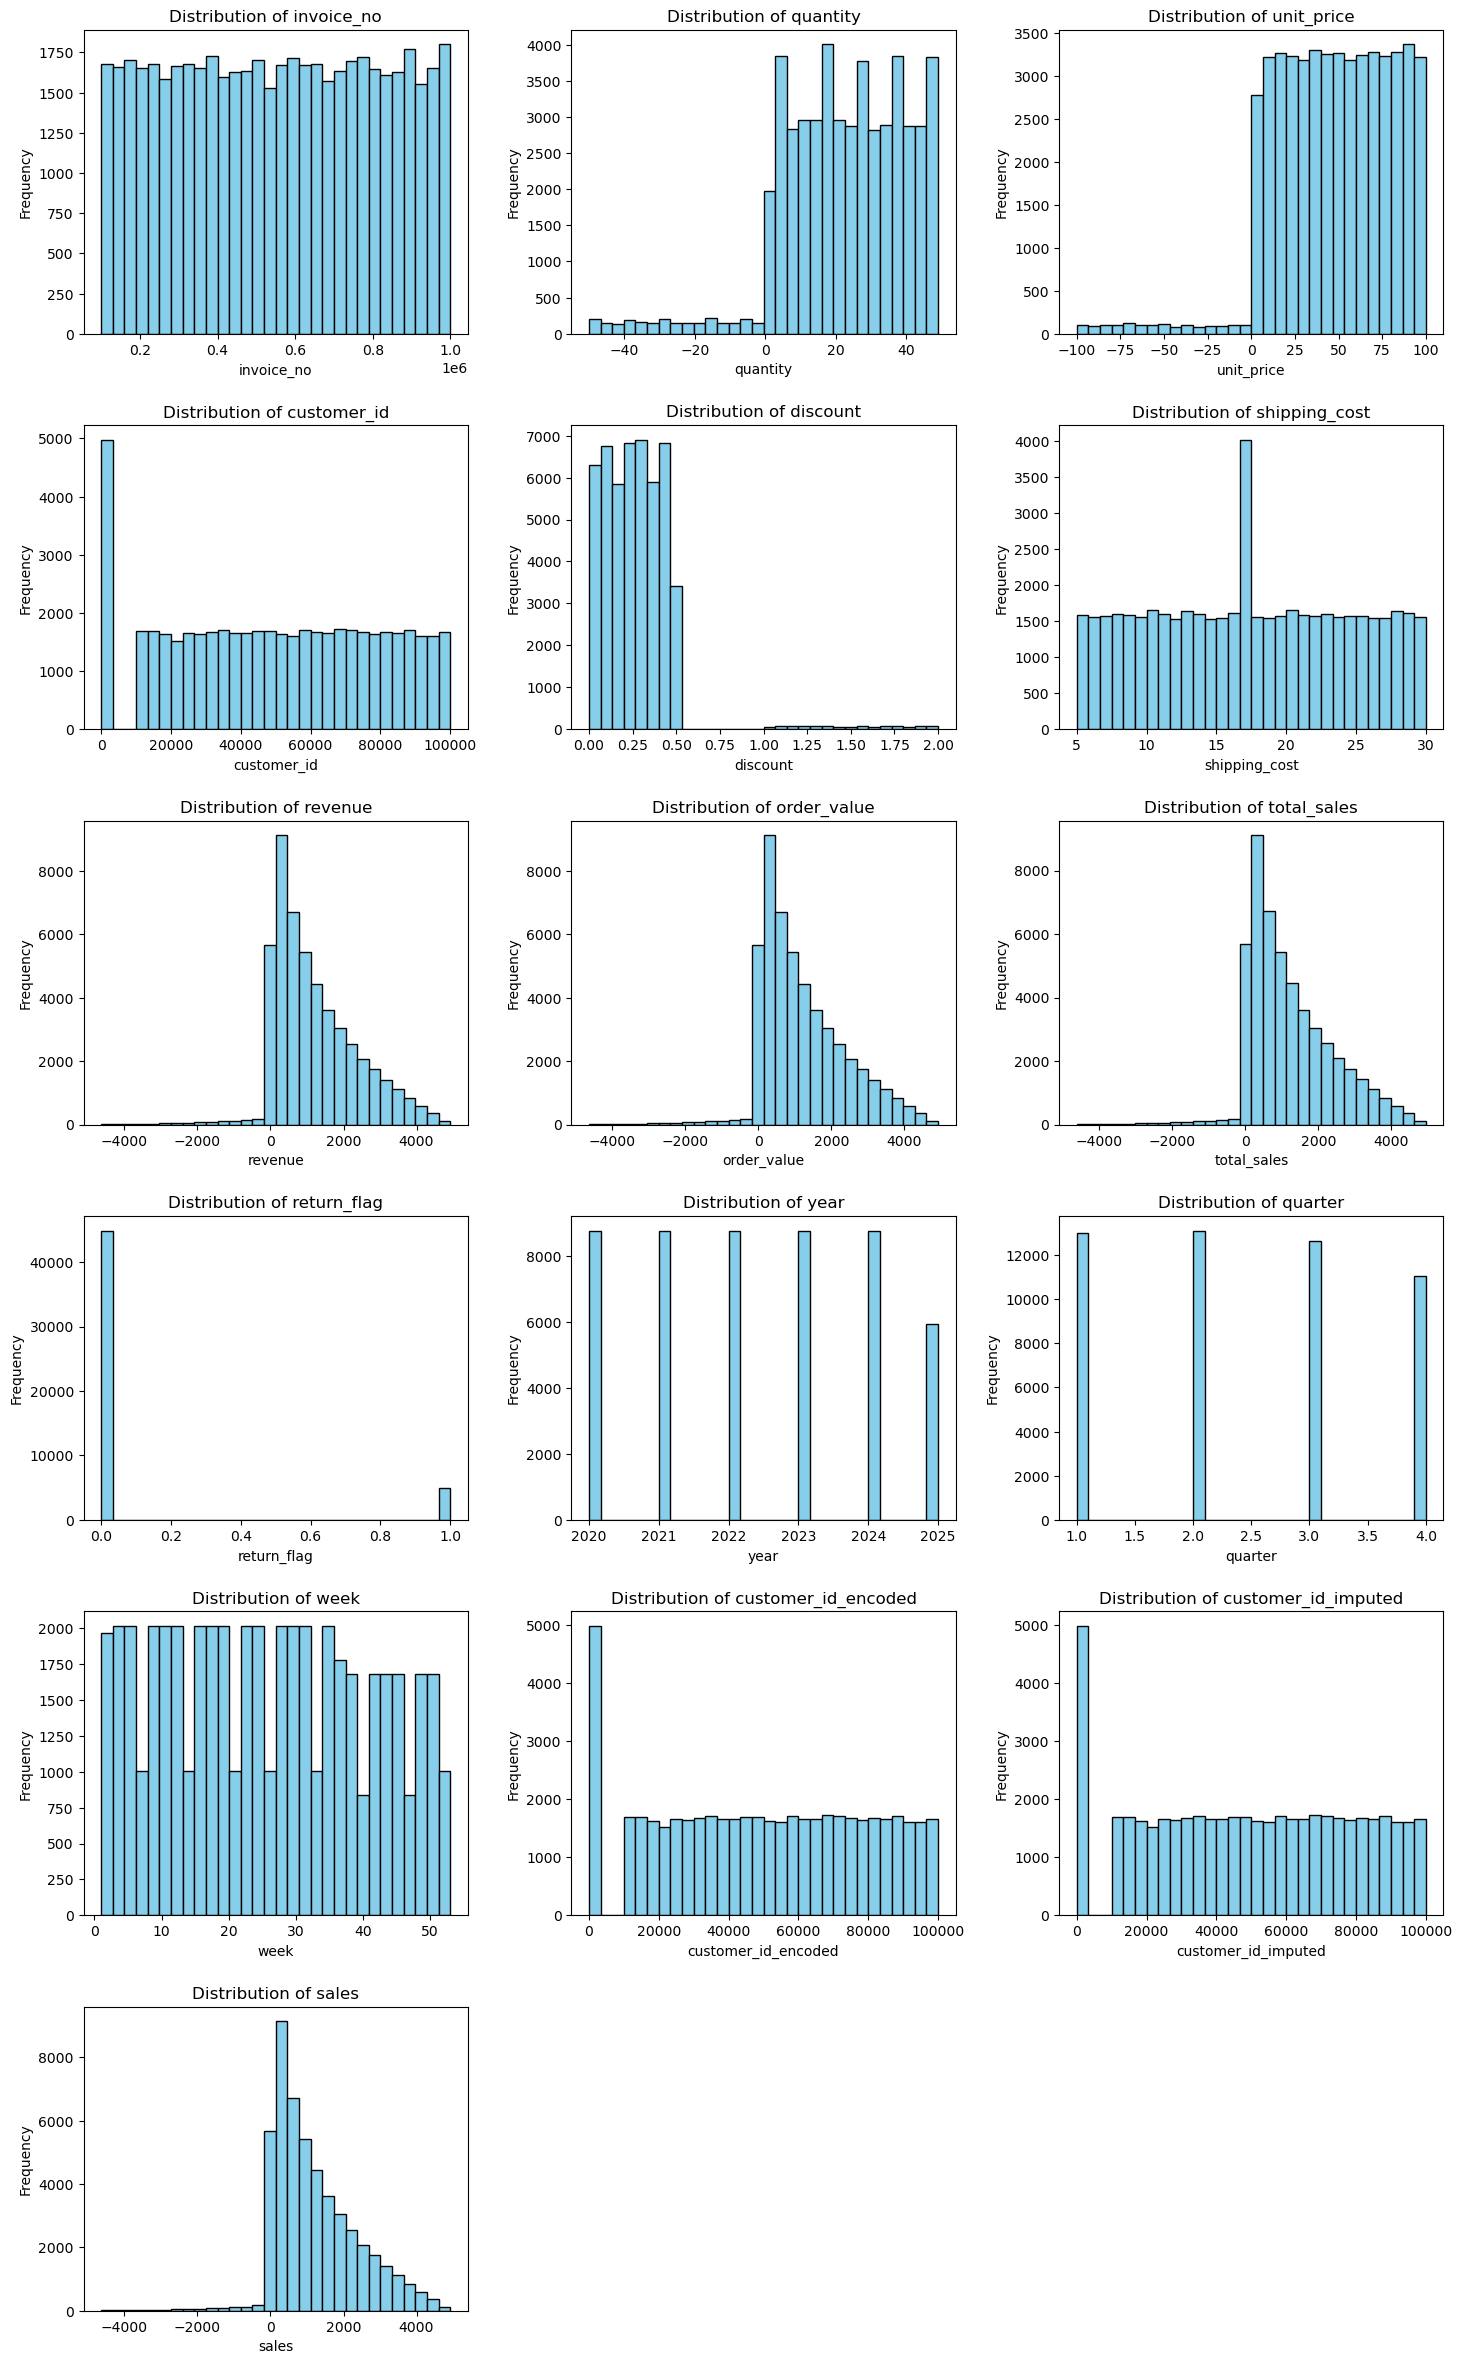

In [412]:
# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(num_cols)

# Determine number of rows and columns for subplots (e.g., 3 columns)
cols = 3
rows = (num_plots + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Optional: remove grid for cleaner look

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

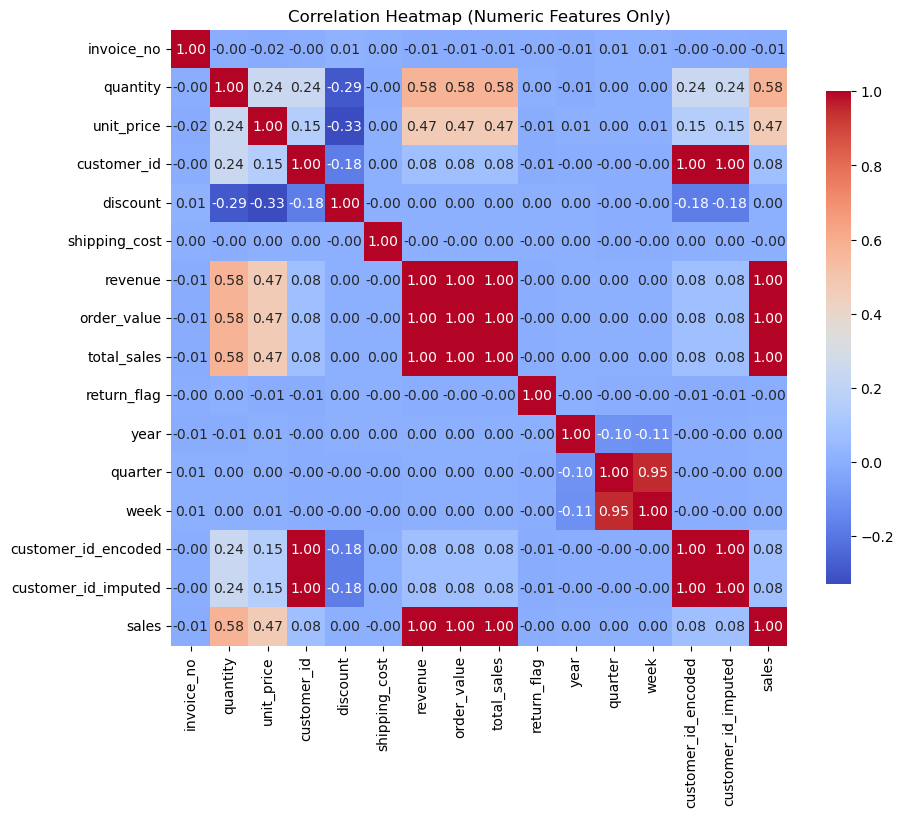

In [414]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns only
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

C:\Users\umehc\AppData\Local\Temp\ipykernel_31380\1431543507.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_sales = df.groupby('month').apply(


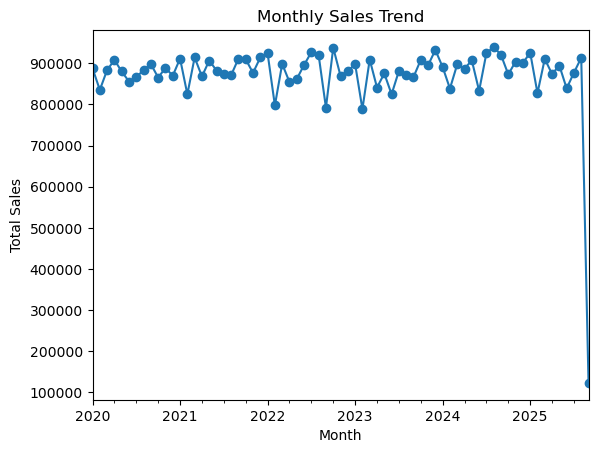

In [416]:
# 8. Sales trends over time (if 'invoice_date' or similar exists)
if 'invoice_date' in df.columns:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])
    df['month'] = df['invoice_date'].dt.to_period('M')
    monthly_sales = df.groupby('month').apply(
        lambda x: (x['quantity'] * x['unit_price']).sum()
    )
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

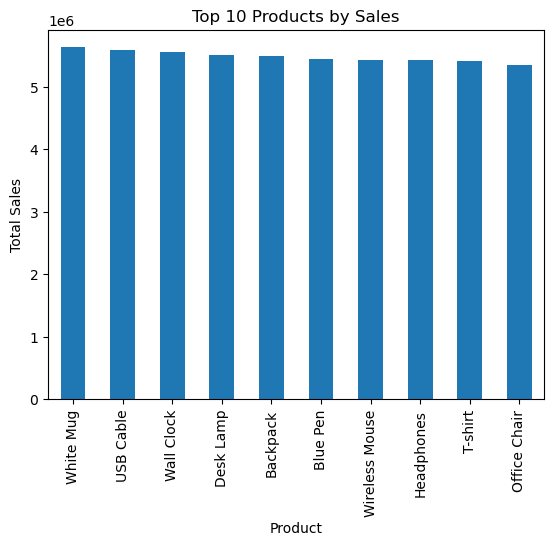

In [418]:
# 9. Top products by sales
if 'description' in df.columns and 'quantity' in df.columns and 'unit_price' in df.columns:
    df['sales'] = df['quantity'] * df['unit_price']
    top_products = df.groupby('description')['sales'].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind='bar')
    plt.title('Top 10 Products by Sales')
    plt.xlabel('Product')
    plt.ylabel('Total Sales')
    plt.show()

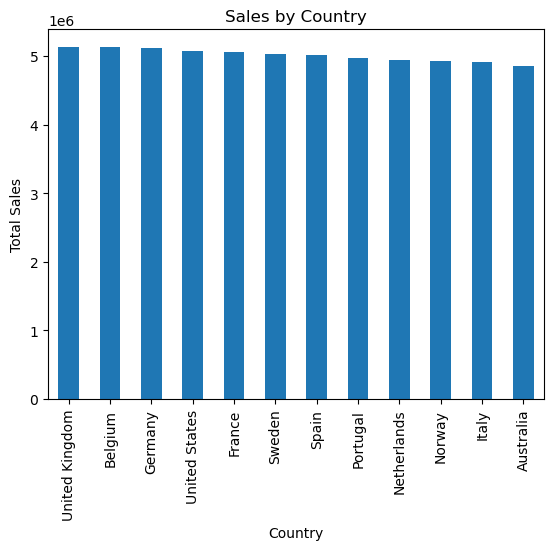

In [420]:
# 10. Sales by country (if 'country' exists)
if 'country' in df.columns:
    country_sales = df.groupby('country')['sales'].sum().sort_values(ascending=False)
    country_sales.plot(kind='bar')
    plt.title('Sales by Country')
    plt.xlabel('Country')
    plt.ylabel('Total Sales')
    plt.show()

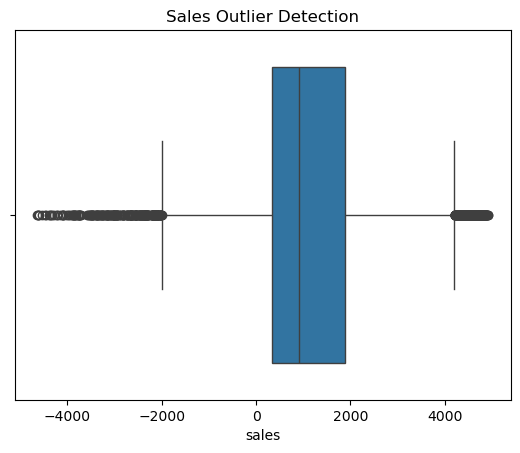

In [422]:
# 11. Outlier detection for sales
sns.boxplot(x=df['sales'])
plt.title('Sales Outlier Detection')
plt.show()

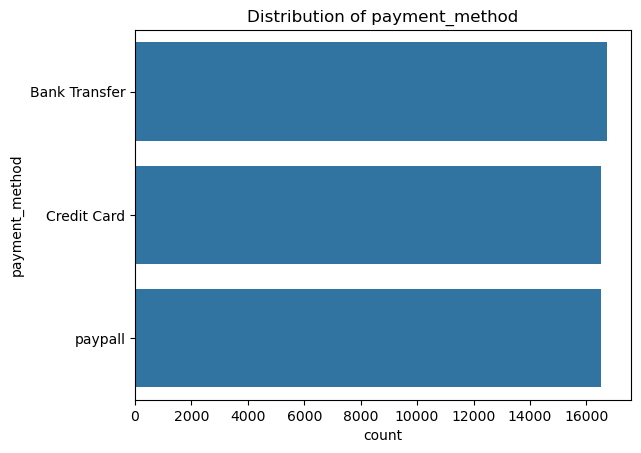

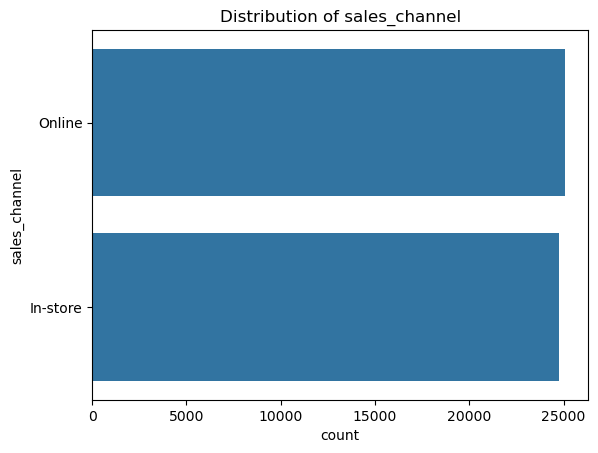

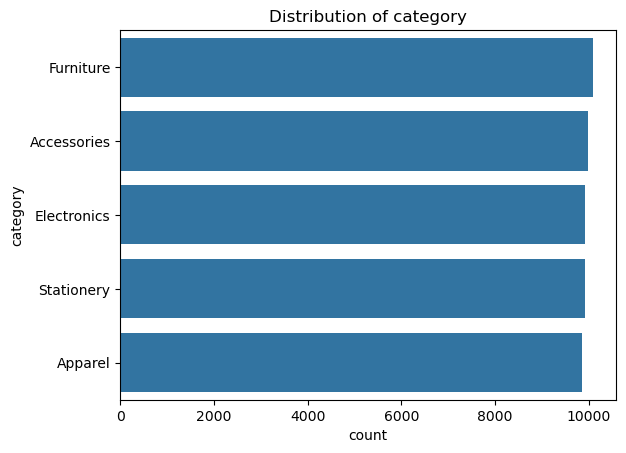

In [424]:
# 12. Categorical breakdown (e.g., payment method, sales channel)
for col in ['payment_method', 'sales_channel', 'category']:
    if col in df.columns:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()

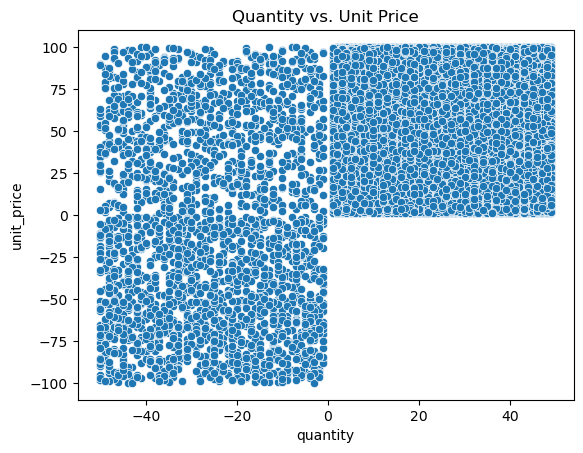


EDA Complete.


In [426]:
# 13. Relationship between quantity and unit price
if 'quantity' in df.columns and 'unit_price' in df.columns:
    sns.scatterplot(x='quantity', y='unit_price', data=df)
    plt.title('Quantity vs. Unit Price')
    plt.show()

print("\nEDA Complete.")

In [428]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,discount,payment_method,...,total_sales,return_flag,year,month,quarter,day_of_week,week,customer_id_encoded,customer_id_imputed,sales
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.470000,Bank Transfer,...,75.300000,0,2020,2020-01,1,Wednesday,1,37039.0,37039.0,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.190000,paypall,...,751.820000,0,2020,2020-01,1,Wednesday,1,19144.0,19144.0,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.350000,Bank Transfer,...,1449.070000,1,2020,2020-01,1,Wednesday,1,50472.0,50472.0,1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.140000,paypall,...,1084.460000,0,2020,2020-01,1,Wednesday,1,96586.0,96586.0,1073.52
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,0,United Kingdom,1.501433,Bank Transfer,...,2059.293096,0,2020,2020-01,1,Wednesday,1,0.0,0.0,2043.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445,Spain,0.200000,Credit Card,...,1781.760000,1,2025,2025-09,3,Friday,36,51445.0,51445.0,1773.00
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.230000,Bank Transfer,...,385.500000,0,2025,2025-09,3,Friday,36,28879.0,28879.0,362.18
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.200000,Bank Transfer,...,3681.810000,0,2025,2025-09,3,Friday,36,21825.0,21825.0,3665.75
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.310000,paypall,...,1930.970000,0,2025,2025-09,3,Friday,36,43199.0,43199.0,1902.72


*****Hypothesis Testing*****

*****Sales Channel and Revenue*****

****Hypothesis 1: Sales through specific sales_channel generate higher revenue.****

In [433]:
# Step 1: Calculate revenue for each row
df['revenue'] = (df['unit_price'] * df['quantity']) - df['discount']

In [435]:
# Step 2: Group by sales_channel and calculate total revenue
channel_revenue = df.groupby('sales_channel')['revenue'].sum().reset_index()
channel_revenue.columns = ['sales_channel', 'total_revenue']

In [437]:
# Step 3: Display the results
print("Total Revenue by Sales Channel:")
print(channel_revenue)

Total Revenue by Sales Channel:
  sales_channel  total_revenue
0      In-store   2.997508e+07
1        Online   3.015372e+07


C:\Users\umehc\AppData\Local\Temp\ipykernel_31380\136357419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_channel', y='total_revenue', data=channel_revenue, palette='Set2')


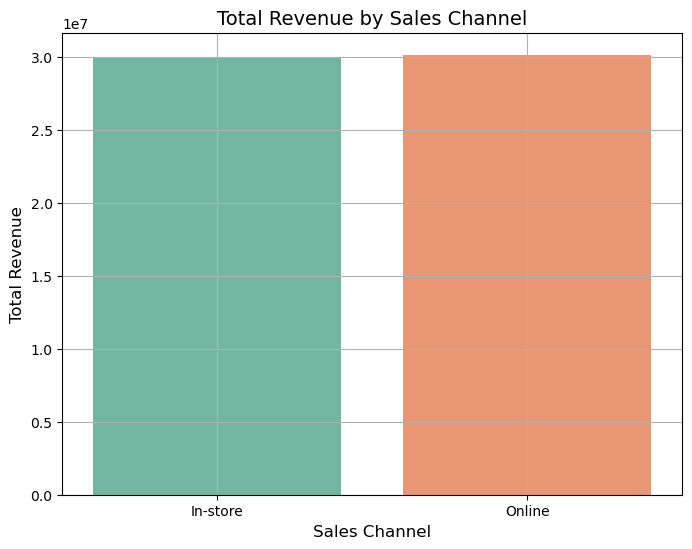

In [439]:
# Step 4: Visualize the revenue by sales channel
plt.figure(figsize=(8, 6))
sns.barplot(x='sales_channel', y='total_revenue', data=channel_revenue, palette='Set2')
plt.title('Total Revenue by Sales Channel', fontsize=14)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.show()

*****Discounts and Quantity Purchased*****

****Hypothesis 2: Higher discounts lead to an increase in the quantity of items purchased.****

In [443]:
# Step 1: Calculate the correlation between discount and quantity
correlation, p_value = pearsonr(df['discount'], df['quantity'])
print(f"Correlation between discount and quantity: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation between discount and quantity: -0.29
P-value: 0.0000


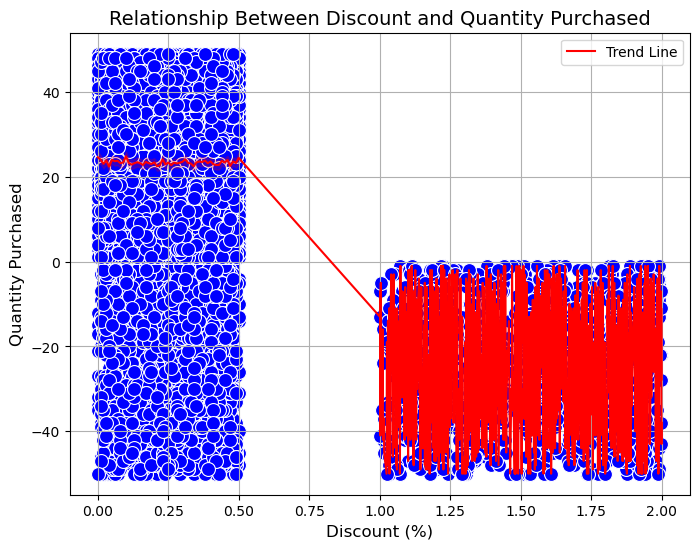

In [445]:
# Step 2: Visualize the relationship between discount and quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount', y='quantity', data=df, color='blue', s=100)
sns.lineplot(x='discount', y='quantity', data=df, color='red', label='Trend Line')
plt.title('Relationship Between Discount and Quantity Purchased', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Quantity Purchased', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [447]:
# Step 3: Interpret the results
if p_value < 0.05:
    print("The correlation between discount and quantity is statistically significant.")
else:
    print("The correlation between discount and quantity is not statistically significant.")

The correlation between discount and quantity is statistically significant.


*****Country and Average Order Value*****

****Hypothesis 3: Orders from certain countries have higher average order values.****

In [451]:
# Step 1: Calculate the order value for each row
df['order_value'] = (df['unit_price'] * df['quantity']) - df['discount']

In [453]:
# Step 2: Group by country and calculate the average order value
country_avg_order_value = df.groupby('country')['order_value'].mean().reset_index()
country_avg_order_value.columns = ['country', 'average_order_value']

In [455]:
# Step 3: Display the results
print("Average Order Value by Country:")
print(country_avg_order_value)

Average Order Value by Country:
           country  average_order_value
0        Australia          1178.993822
1          Belgium          1228.518569
2           France          1196.771205
3          Germany          1221.946853
4            Italy          1212.507605
5      Netherlands          1182.269453
6           Norway          1185.734871
7         Portugal          1194.682566
8            Spain          1222.786010
9           Sweden          1193.947704
10  United Kingdom          1226.573973
11   United States          1250.634454


C:\Users\umehc\AppData\Local\Temp\ipykernel_31380\516771463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='average_order_value', data=country_avg_order_value, palette='Set2')


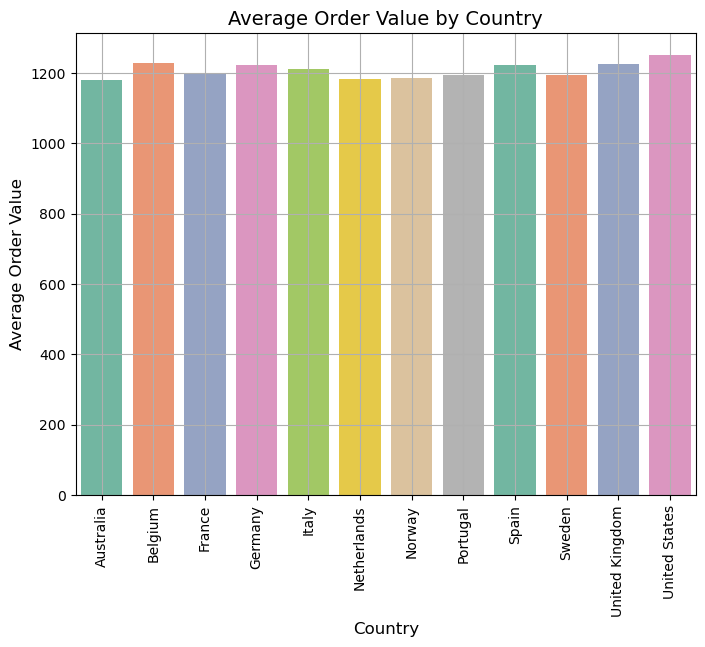

In [457]:
# Step 4: Visualize the average order value by country
plt.figure(figsize=(8, 6))
sns.barplot(x='country', y='average_order_value', data=country_avg_order_value, palette='Set2')
plt.title('Average Order Value by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

*****Category and Average Discount*****

****Hypothesis 4: Certain product categories receive higher average discounts.****

In [461]:
# Step 1: Group by category and calculate the average discount
category_avg_discount = df.groupby('category')['discount'].mean().reset_index()
category_avg_discount.columns = ['category', 'average_discount']

In [463]:
# Step 2: Display the results
print("Average Discount by Category:")
print(category_avg_discount)

Average Discount by Category:
      category  average_discount
0  Accessories          0.274611
1      Apparel          0.273157
2  Electronics          0.276590
3    Furniture          0.278429
4   Stationery          0.275897


C:\Users\umehc\AppData\Local\Temp\ipykernel_31380\2445947933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='average_discount', data=category_avg_discount, palette='Set2')


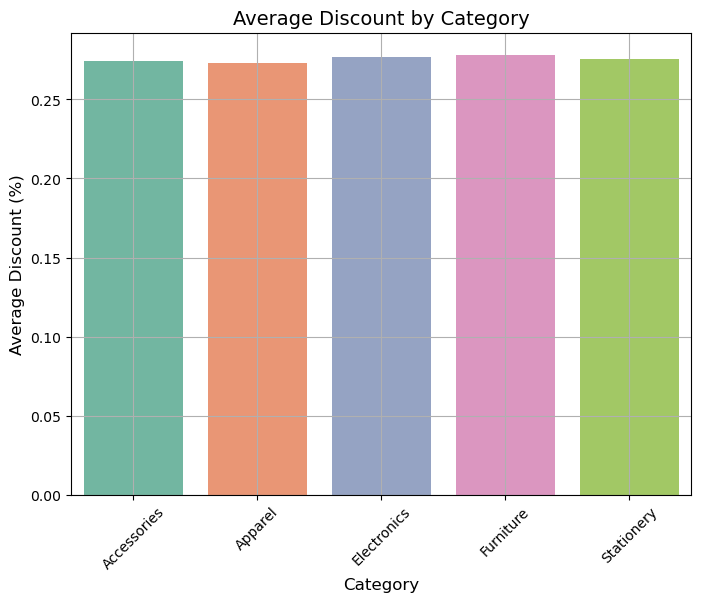

In [465]:
# Step 3: Visualize the average discount by category
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='average_discount', data=category_avg_discount, palette='Set2')
plt.title('Average Discount by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Discount (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.grid(True)
plt.show()